In [1]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error #不太靠谱 太劲大求了。差的平方的均值
from sklearn.metrics import explained_variance_score #越小代表结果越差
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score #交叉验证
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline
X = pd.read_excel('./input5.xlsx')
#X['dayofyear'] = X['日期'].apply(lambda x : x.dayofyear)
X['year'] = X['日期'].apply(lambda x : x.year)
X['dayofweek'] =  X['日期'].apply(lambda x: x.dayofweek)
X['dayofmonth'] = X['日期'].apply(lambda x: x.day)
X['前一天供水量'] = X['总供水量'].shift(1)
X['再往前一天供水量'] = X['总供水量'].shift(2)
X = X[~pd.isnull(X['再往前一天供水量'])]
y = X.pop('总供水量')
drop = ['日期','星期','24节气']
X.drop(drop,axis = 1,inplace = True)
X_reset = X.reset_index(drop = True)

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X_input = pd.get_dummies(X_reset)
X_train,X_test,y_train,y_test = train_test_split(X_input,y,test_size = 0.2)

# 决策树

Text(0.5,1,'决策树平均偏差')

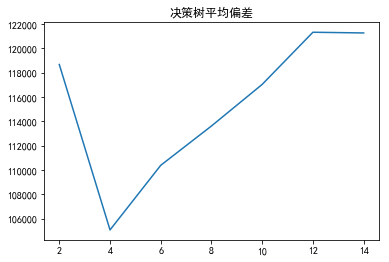

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
params = [2,4,6,8,10,12,14]
scores = []
for para in params:
    clf = DecisionTreeRegressor(max_depth=para)
    test_score = -cross_val_score(clf,X_input,y,scoring = 'neg_mean_absolute_error',cv = 10)
    scores.append(np.mean(test_score))
plt.plot(params, scores)
plt.title("决策树平均偏差")

# Adaboost 

Text(0.5,1,'决策树平均偏差')

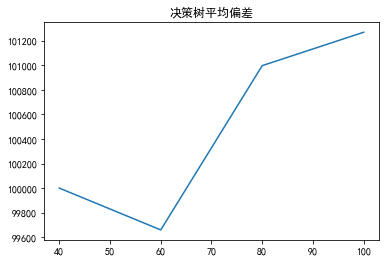

In [31]:
ada_params = [40,60,80,100]
ada_scores = []
for para in ada_params:
    clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators= para)
    test_score = -cross_val_score(clf,X_input,y,scoring = 'neg_mean_absolute_error',cv = 10)
    ada_scores.append(np.mean(test_score))
plt.plot(ada_params, ada_scores)
plt.title("决策树平均偏差")